In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("FinalData_Raw.csv")

Exploratory Data Analysis

In [209]:
df.shape

(206, 43)

In [210]:
df.size

8858

In [129]:
df.columns

Index(['Year', 'Gender', 'Race/Ethnicity', 'LEP Status', 'LEP Numeric',
       'Economically Disadvantaged Status', 'ED Numeric', 'Language Code',
       'English Language Proficiency Level', 'ELPL Numeric',
       'Primary Disability Type', 'ELA Scale Score', 'ELA Achievement Level',
       'ELA AL ', 'Math Scale Score', 'Math Achievement Level', 'Math AL ',
       'Concepts and Procedures Claim Achievement Category',
       'Problem Solving and Modeling & Data Analysis Claim Achievement Category',
       'Communicating Reasoning Claim Achievement Category', 'Fall RIT',
       'Fall %ile', 'Typical RIT Growth Points', 'Tiered RIT Growth Points',
       'Winter GOAL Score', 'Spring GOAL Score', 'Winter RIT', 'Winter %ile',
       'BOY to Winter Growth', 'Met Winter goal?', 'Met Winter Goal Numeric',
       'Spring RIT', 'Spring %ile', 'BOY to Spring RIT Growth',
       'Winter to Spring RIT Growth ', 'Met Spring Goal?',
       'Met Spring Goal Numeric ', 'Num Math AL', 'Gender Num', 'R

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 38 columns):
Year                                                                       206 non-null int64
Gender                                                                     206 non-null object
Race/Ethnicity                                                             206 non-null object
LEP Status                                                                 206 non-null object
LEP Numeric                                                                206 non-null int64
Economically Disadvantaged Status                                          206 non-null object
ED Numeric                                                                 206 non-null int64
Language Code                                                              206 non-null object
English Language Proficiency Level                                         99 non-null object
ELPL Numeric                                

In [25]:
df.head()

,Year,Gender,Race/Ethnicity,LEP Status,LEP Numeric,Economically Disadvantaged Status,ED Numeric,Language Code,English Language Proficiency Level,ELPL Numeric,...,BOY to Winter Growth,Met Winter goal?,Met Winter Goal Numeric,Spring RIT,Spring %ile,BOY to Spring RIT Growth,Winter to Spring RIT Growth,Met Spring Goal?,Met Spring Goal Numeric,Gender Numeric
0,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,17,Yes,1,201,24,6,-11,Not Yet,0,F
1,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,11,Yes,1,201,24,2,-9,Not Yet,0,F
2,2017,M,White,N,0,Y,1,ENG,NaN,6,...,6,Yes,1,212,51,5,-1,Not Yet,0,M
3,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,-2,No,0,203,28,3,5,Not Yet,0,F
4,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,1,No,0,215,59,6,5,Not Yet,0,F


In [15]:
dfdata = df.filter(["Gender", "Race/Ethnicity", "LEP Status", "Economically Disadvantaged Status", "Language Code"])
dfdata.describe(include = "all")

,Gender,Race/Ethnicity,LEP Status,Economically Disadvantaged Status,Language Code
count,206,206,206,206,206
unique,2,6,2,2,10
top,M,Hispanic or Latino,N,Y,SPA
freq,107,157,129,132,133


In [102]:
#.filter helped me choose the attributes I wanted to analyze 

df_1 = df.filter(["ED Numeric","ELPL Numeric","ELA Scale Score", "Math Scale Score","Fall RIT","Winter RIT","Met Winter Goal Numeric","Met Spring Goal Numeric"])

df_1.corr().round(1)
 

,ED Numeric,ELPL Numeric,ELA Scale Score,Math Scale Score,Fall RIT,Winter RIT,Met Winter Goal Numeric
ED Numeric,1.0,-0.2,-0.0,0.0,0.1,0.1,-0.1
ELPL Numeric,-0.2,1.0,0.5,0.5,0.5,0.4,-0.0
ELA Scale Score,-0.0,0.5,1.0,0.8,0.8,0.8,0.1
Math Scale Score,0.0,0.5,0.8,1.0,0.8,0.8,0.1
Fall RIT,0.1,0.5,0.8,0.8,1.0,0.9,-0.1
Winter RIT,0.1,0.4,0.8,0.8,0.9,1.0,0.2
Met Winter Goal Numeric,-0.1,-0.0,0.1,0.1,-0.1,0.2,1.0


In [5]:
df_race = df.groupby("Race/Ethnicity")
df_race["BOY to Spring RIT Growth","Math Scale Score", "ELA Scale Score"].mean().round(1)


,BOY to Spring RIT Growth,Math Scale Score,ELA Scale Score
Race/Ethnicity,,,
Asian,12.4,2612.7,2573.9
Black or African American,9.0,2372.0,2329.0
Filipino,5.0,2582.3,2523.7
Hispanic or Latino,12.3,2548.9,2506.4
Native Hawaiian or Pacific Islander,-16.5,2367.5,2313.5
White,9.8,2597.0,2522.8


In [337]:
df_gender = df.groupby("Gender")
df_gender["Fall RIT"].mean().round(1)

Gender
F    211.8
M    204.8
Name: Fall RIT, dtype: float64

In [26]:
df["Gender Numeric"] = df["Gender"].replace({"M": 1, "F": 0})


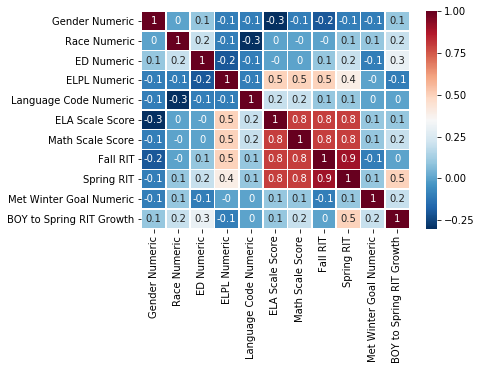

In [33]:
df1 = df.filter(["Gender Numeric","Race Numeric","ED Numeric",
                 "ELPL Numeric","Language Code Numeric",
                 "ELA Scale Score", "Math Scale Score",
                 "Fall RIT","Spring RIT","Met Winter Goal Numeric",
                 "Met Spring Goal Numeric", 
                 "BOY to Spring RIT Growth"])

df1_corr = df1.corr().round(1)

sns.heatmap(df1_corr, 
            xticklabels=df1_corr.columns,
            yticklabels=df1_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
 

*****VISUALIZATIONS*****

Text(0.5, 1.0, 'SBAC Math Scores')

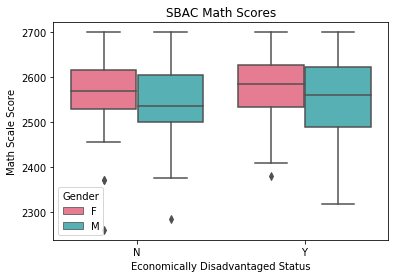

In [4]:
colors = ["#f76a87","#48bec2"]
sns.boxplot(x = "Economically Disadvantaged Status", y = "Math Scale Score", 
            hue = "Gender", data = df, palette = colors).set_title("SBAC Math Scores")

Text(0.5, 1.0, 'Student Fall Math MAP Scores')

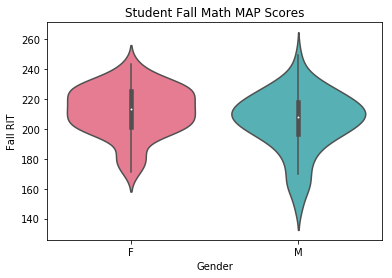

In [5]:
colors = ["#f76a87","#48bec2"]

sns.violinplot(x = "Gender", y = "Fall RIT",
               data = df, palette= colors).set_title("Student Fall Math MAP Scores")


In [6]:
df_race = df.groupby("Race/Ethnicity")
df_race["BOY to Spring RIT Growth","Math Scale Score"].mean().round(1)

,BOY to Spring RIT Growth,Math Scale Score
Race/Ethnicity,,
Asian,12.4,2612.7
Black or African American,9.0,2372.0
Filipino,5.0,2582.3
Hispanic or Latino,12.3,2548.9
Native Hawaiian or Pacific Islander,-16.5,2367.5
White,9.8,2597.0


AttributeError: 'Text' object has no attribute 'setp'

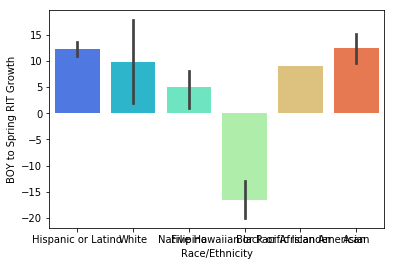

In [55]:
plot = sns.barplot(x = "Race/Ethnicity", y = "BOY to Spring RIT Growth", data = df,palette= "rainbow")
plt.setp(plot.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Students by Race')

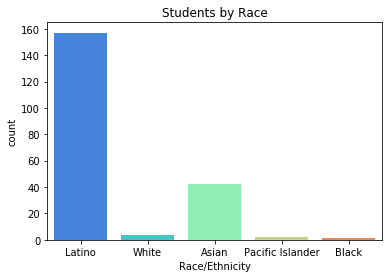

In [251]:
sns.countplot(x = "Race/Ethnicity", data = df,
              palette= "rainbow", orient = "v").set_title("Students by Race")






Text(0.5, 1.0, 'Limited English Proficiency by Race')

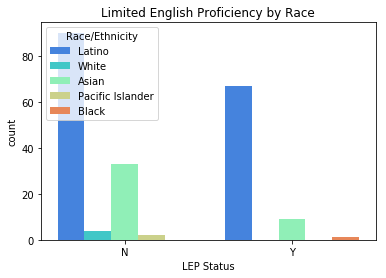

In [207]:
sns.countplot(x = "LEP Status", 
              hue = "Race/Ethnicity",data = df, 
              palette = "rainbow").set_title("Limited English Proficiency by Race")

In [208]:
df_LEP = df.groupby("LEP Status")

df_LEP.value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

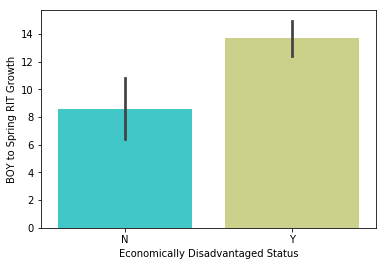

In [166]:
sns.barplot(x = "Economically Disadvantaged Status", y = "BOY to Spring RIT Growth", 
        data = df, palette = "rainbow")

[None, None, None, None, None, None, None, None, None, None, None, None]

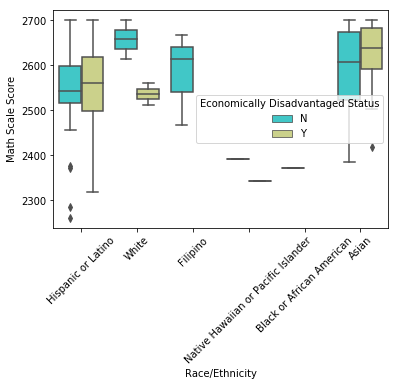

In [186]:
plot = sns.boxplot(x = "Race/Ethnicity", y = "Math Scale Score", hue = "Economically Disadvantaged Status", data = df,palette= "rainbow")
plt.setp(plot.get_xticklabels(), rotation=45)

Text(0.5, 1.0, 'Gender')

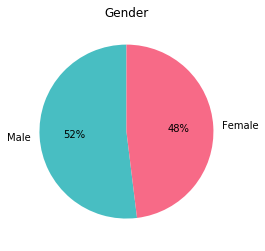

In [20]:
colors = ["#48bec2","#f76a87"]
counts = [107,99]
genders = ["Male", "Female"]
plt.pie(counts, labels = genders, colors = colors,autopct = "%1.0f%%", startangle = 90)
plt.title("Gender")



Text(0.5, 1.0, 'SBAC Math Scores')

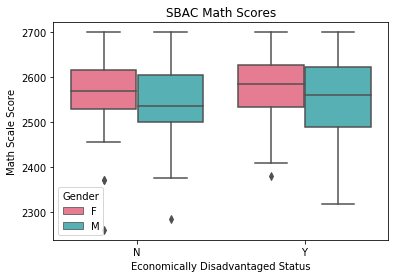

In [257]:
colors = ["#f76a87","#48bec2"]
sns.boxplot(x = "Economically Disadvantaged Status", y = "Math Scale Score", 
            hue = "Gender", data = df, palette = colors).set_title("SBAC Math Scores")

In [ ]:
colors = ["#f76a87","#48bec2"]

sns.violinplot(x = "Gender", y = "Fall RIT",
               data = df, palette= colors).set_title("Student Fall Math MAP Scores")


Text(0.5, 1.0, 'SBAC ELA Scores')

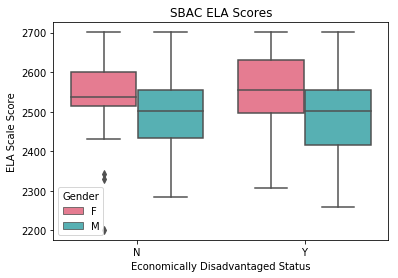

In [259]:
colors = ["#f76a87","#48bec2"]
sns.boxplot(x = "Economically Disadvantaged Status", y = "ELA Scale Score", 
            hue = "Gender", data = df, palette = colors).set_title("SBAC ELA Scores")

Text(0.5, 1.0, 'SBAC Math Score by Race')

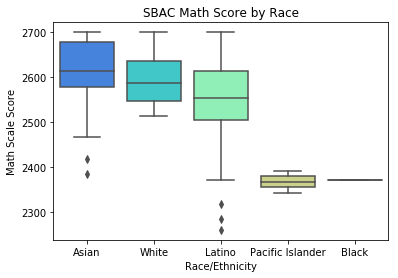

In [204]:
#How do you change the order in which the x labels appear? --> order 

sns.boxplot(x = "Race/Ethnicity", y = "Math Scale Score", 
                     data = df, 
                     order = ["Asian", "White", "Latino","Pacific Islander","Black"],
                     palette= "rainbow").set_title("SBAC Math Score by Race")


Text(0.5, 1.0, 'SBAC ELA Score by Race')

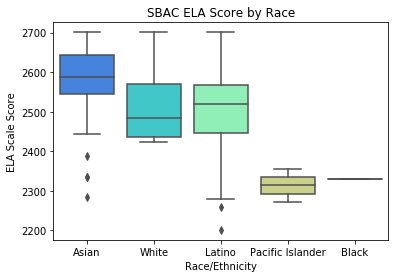

In [205]:
#How do you change the order in which the x labels appear? --> order 

sns.boxplot(x = "Race/Ethnicity", y = "ELA Scale Score", 
                     data = df, 
                     order = ["Asian", "White", "Latino","Pacific Islander","Black"],
                     palette= "rainbow").set_title("SBAC ELA Score by Race")


[None, None, None, None, None, None, None, None, None, None, None, None]

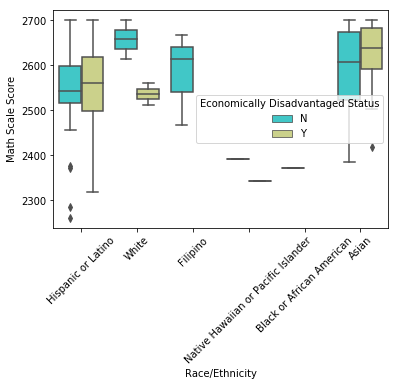

In [85]:
plot = sns.boxplot(x = "Race/Ethnicity", y = "Math Scale Score", hue = "Economically Disadvantaged Status", data = df,palette= "rainbow")
plt.setp(plot.get_xticklabels(), rotation=45)

In [42]:
df.groupby("Economically Disadvantaged Status")[["Spring %ile"]].mean()

,Spring %ile
Economically Disadvantaged Status,
N,56.702703
Y,58.719697


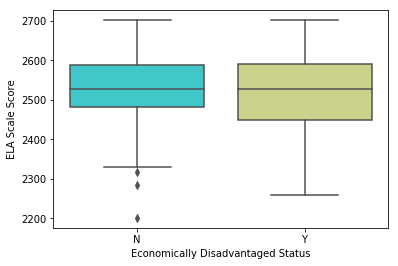

In [176]:
sns.boxplot(x = "Economically Disadvantaged Status", y = "ELA Scale Score",data = df, palette= "rainbow")


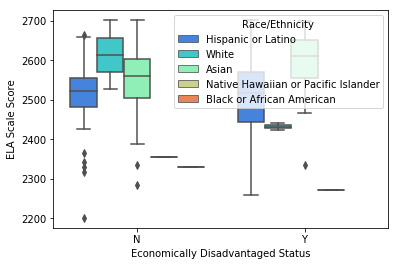

In [196]:
sns.boxplot(x = "Economically Disadvantaged Status", y = "ELA Scale Score", hue = "Race/Ethnicity",data = df, palette= "rainbow")

(140, 280)

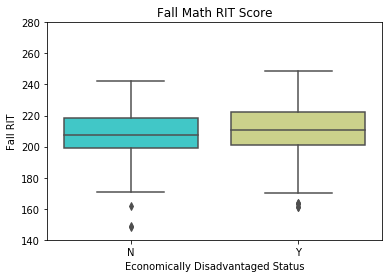

In [174]:
sns.boxplot(x = "Economically Disadvantaged Status", 
            y = "Fall RIT", data = df, 
            palette= "rainbow").set_title("Fall Math RIT Score")
plt.ylim(140, 280)

(140, 280)

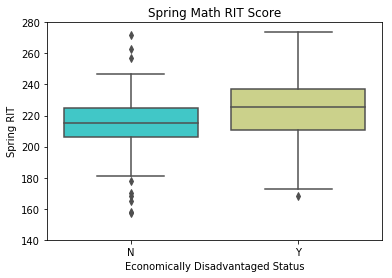

In [175]:
sns.boxplot(x = "Economically Disadvantaged Status", 
            y = "Spring RIT",data = df, 
            palette= "rainbow").set_title("Spring Math RIT Score")
plt.ylim(140, 280)

Text(0.5, 1.0, 'Student Fall Math MAP Scores')

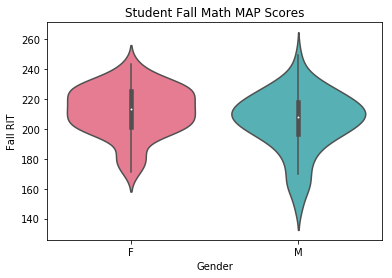

In [335]:
colors = ["#f76a87","#48bec2"]

sns.violinplot(x = "Gender", y = "Fall RIT",
               data = df, palette= colors).set_title("Student Fall Math MAP Scores")


(0, 260)

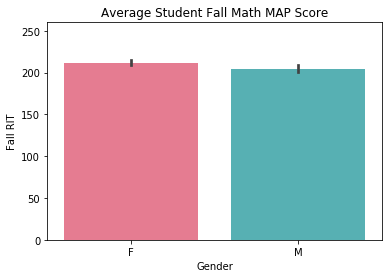

In [336]:
colors = ["#f76a87","#48bec2"]

sns.barplot(x = "Gender", y = "Fall RIT",
               data = df, palette= colors).set_title("Average Student Fall Math MAP Score")

plt.ylim(0, 260)

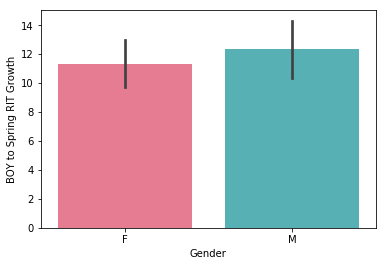

In [262]:
colors = ["#f76a87","#48bec2"]

sns.barplot(x = "Gender", y = "BOY to Spring RIT Growth",
               data = df, palette= colors)

Text(0.5, 1.0, 'Math SBAC Performance by Achievement Level')

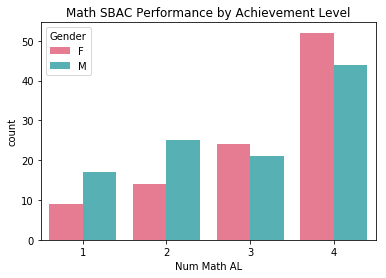

In [306]:
colors =["#f76a87","#48bec2"]

sns.countplot(x="Num Math AL", hue = "Gender", 
              data = df, palette = colors).set_title("Math SBAC Performance by Achievement Level")



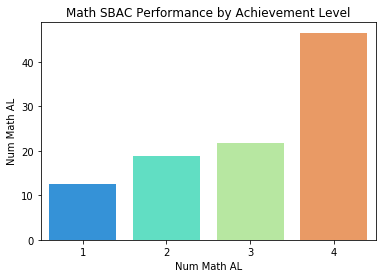

In [315]:
#This graph is not giving me what I want. I want to see the breakdown
#of race 

graph = sns.barplot(x="Num Math AL",y ="Num Math AL",estimator = lambda x: len (x) / len (df) *100,
               data = df, palette = "rainbow").set_title("Math SBAC Performance by Achievement Level")

#Can't get the labels to work. 
#graph.set(xlabel = "Math Achievement Level",ylabel = "Percent")


Text(0.5, 1.0, 'ELA SBAC Performance by Achievement Level')

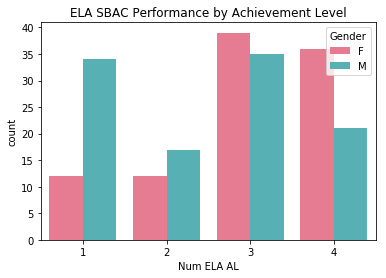

In [281]:
sns.countplot(x="Num ELA AL", hue = "Gender", 
              data = df, palette = colors).set_title("ELA SBAC Performance by Achievement Level")


Text(0.5, 1.0, 'Student Growth Throughout the Year')

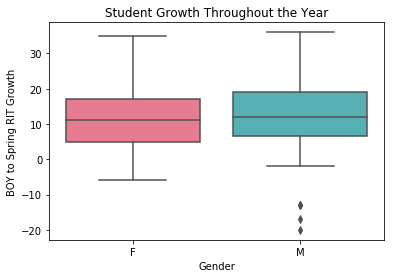

In [295]:
colors =["#f76a87","#48bec2"]
sns.boxplot(x="Gender", y = "BOY to Spring RIT Growth", data = df, palette= colors).set_title("Student Growth Throughout the Year")





Text(0.5, 1.0, 'Student Growth Throughout the Year')

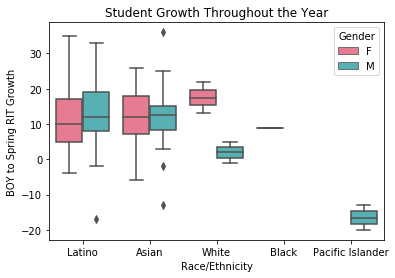

In [298]:
colors =["#f76a87","#48bec2"]
sns.boxplot(x="Race/Ethnicity", 
            y = "BOY to Spring RIT Growth", 
            hue = "Gender", data = df, 
            order = ["Latino", "Asian", "White", "Black","Pacific Islander"],
            palette= colors).set_title("Student Growth Throughout the Year")





In [47]:
df.head()

,Year,Gender,Race/Ethnicity,LEP Status,LEP Numeric,Economically Disadvantaged Status,ED Numeric,Language Code,English Language Proficiency Level,ELPL Numeric,...,Met Winter Goal Numeric,Spring RIT,Spring %ile,BOY to Spring RIT Growth,Winter to Spring RIT Growth,Met Spring Goal?,Met Spring Goal Numeric,Gender Numeric,Race Numeric,Language Code Numeric
0,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,1,201,24,6,-11,Not Yet,0,0,6,1
1,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,1,201,24,2,-9,Not Yet,0,0,6,1
2,2017,M,White,N,0,Y,1,ENG,NaN,6,...,1,212,51,5,-1,Not Yet,0,1,4,1
3,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,0,203,28,3,5,Not Yet,0,0,6,1
4,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,0,215,59,6,5,Not Yet,0,0,6,1


AttributeError: 'Text' object has no attribute 'setp'

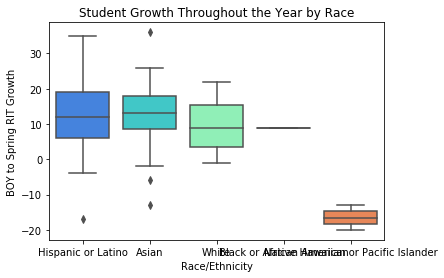

In [52]:
plot = sns.boxplot(x="Race/Ethnicity", 
            y = "BOY to Spring RIT Growth", 
            data = df, 
            order = ["Hispanic or Latino", "Asian", "White", "Black or African American","Native Hawaiian or Pacific Islander"],
            palette= "rainbow").set_title("Student Growth Throughout the Year by Race")
plt.setp(plot.get_xticklabels(), rotation=45)

In [330]:
sns.barplot(x = ["Fall RIT", "Spring RIT"], y = ["Fall RIT", "Spring RIT"],
               data = df, hue = "Gender", palette= colors)

ValueError: could not broadcast input array from shape (206,2) into shape (206)

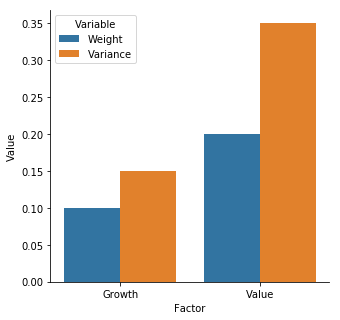

In [321]:
sns.barplot(x=("Fall RIT","Spring RIT") y = "BOY to Spring RIT Growth", hue = "Combined Race", data = df, palette= "rainbow")

In [326]:
print(df_ex.head())

print(df.head())

   Factor  Weight  Variance
0  Growth     0.1      0.15
1   Value     0.2      0.35
   Year Gender      Race/Ethnicity LEP Status  LEP Numeric  \
0  2017      F  Hispanic or Latino          N            0   
1  2017      F  Hispanic or Latino          N            0   
2  2017      M               White          N            0   
3  2017      F  Hispanic or Latino          N            0   
4  2017      F  Hispanic or Latino          N            0   

  Economically Disadvantaged Status  ED Numeric Language Code  \
0                                 N           0           ENG   
1                                 N           0           ENG   
2                                 Y           1           ENG   
3                                 N           0           ENG   
4                                 N           0           ENG   

  English Language Proficiency Level  ELPL Numeric           ...             \
0                                NaN             6           ...         

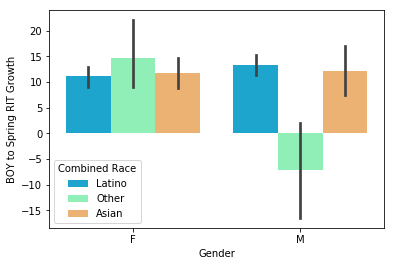

In [290]:
sns.barplot(x="Gender", y = "BOY to Spring RIT Growth", hue = "Combined Race", data = df, palette= "rainbow")

In [211]:
df["Economically Disadvantaged Status"].value_counts()

Y    132
N     74
Name: Economically Disadvantaged Status, dtype: int64

In [212]:
df_disadvantaged = df[df["Economically Disadvantaged Status"] == "Y"]
df_disadvantaged["Race/Ethnicity"].value_counts()

Latino              108
Asian                21
White                 2
Pacific Islander      1
Name: Race/Ethnicity, dtype: int64

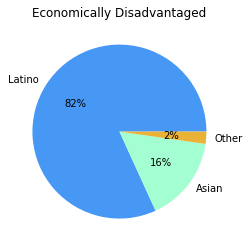

In [215]:
race = ["Latino","Asian", "Other"]
counts = [108,21,3]
colors = ["#4798f5","#a3ffd1","#ebb238"]
plt.pie(counts, labels = race, colors = colors, autopct = "%1.0f%%")
plt.title("Economically Disadvantaged")
plt.show()

In [217]:
df["Race/Ethnicity"].value_counts()

Latino              157
Asian                42
White                 4
Pacific Islander      2
Black                 1
Name: Race/Ethnicity, dtype: int64

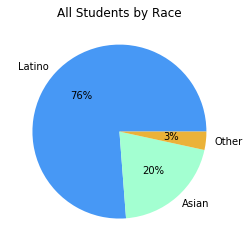

In [218]:
race = ["Latino","Asian", "Other"]
counts = [157,42,7]
colors = ["#4798f5","#a3ffd1","#ebb238"]
plt.pie(counts, labels = race, colors = colors, autopct = "%1.0f%%")
plt.title("All Students by Race")
plt.show()

In [221]:
print("Percent of students that are Economically Disadvantaged by Race:")

df_disadvantaged["Race/Ethnicity"].value_counts()/(df["Race/Ethnicity"].value_counts())

Percent of students that are Economically Disadvantaged by Race:


Asian               0.500000
Black                    NaN
Latino              0.687898
Pacific Islander    0.500000
White               0.500000
Name: Race/Ethnicity, dtype: float64

In [231]:
#Create subsets of the data to create pie charts 
df_Asian = df[df["Race/Ethnicity"]=="Asian"]
df_Latino = df[df["Race/Ethnicity"]=="Latino"]

print(df_Asian["Economically Disadvantaged Status"].value_counts())
print(df_Latino["Economically Disadvantaged Status"].value_counts())

N    21
Y    21
Name: Economically Disadvantaged Status, dtype: int64
Y    108
N     49
Name: Economically Disadvantaged Status, dtype: int64


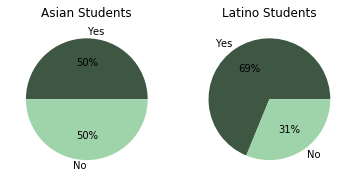

<Figure size 432x288 with 0 Axes>

In [45]:
#How can I create a subset so that the last data frame includes White, Black & PI? 

#df_Other = df[df["Race/Ethnicity"]=="White" or "Pacific Islander" or "Black"]

#df_Other = df[df["Race/Ethnicity"]=="White" 
              #or df["Race/Ethnicity"]=="Pacific Islander" 
              #or df["Race/Ethnicity"]=="Black"]





#Create two pie charts 

plt.subplot(121)
status = ["Yes","No"]
counts = [22,22]
colors = colors = ["#3e5743","#9fd4aa"]
plt.pie(counts, labels = status, colors = colors, autopct = "%1.0f%%")
plt.title("Asian Students")


plt.subplot(122)
status = ["Yes","No"]
counts = [108,49]
colors = colors = ["#3e5743","#9fd4aa"]
plt.pie(counts, labels = status, colors = colors, autopct = "%1.0f%%")
plt.title("Latino Students")
plt.show()

plt.tight_layout()

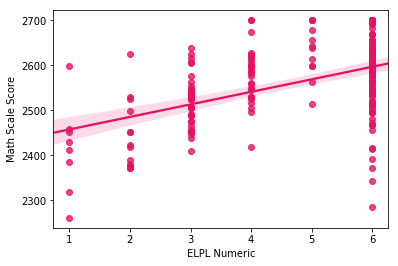

In [41]:
sns.regplot(x="ELPL Numeric", y="Math Scale Score", data=df, color = "#e81063")


Text(0.5, 1.0, 'Spring Math MAP Socres by ELPL Level')

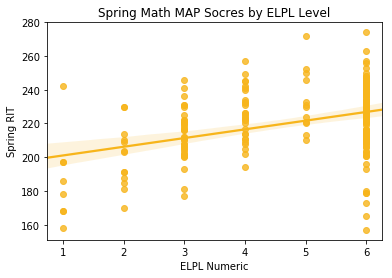

In [39]:
sns.regplot(x="ELPL Numeric", y="Spring RIT", data=df, color = "#f7b51b").set_title("Spring Math MAP Socres by ELPL Level")

Text(0.5, 1.0, 'MAP Growth Throughout the Year by ELPL')

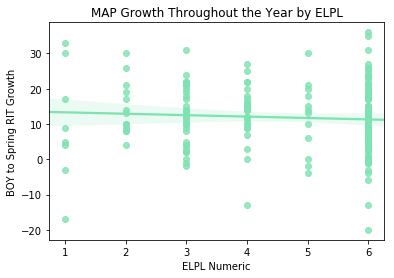

In [44]:
sns.regplot(x="ELPL Numeric", y="BOY to Spring RIT Growth", data=df, color = "#7de3b0").set_title("MAP Growth Throughout the Year by ELPL")


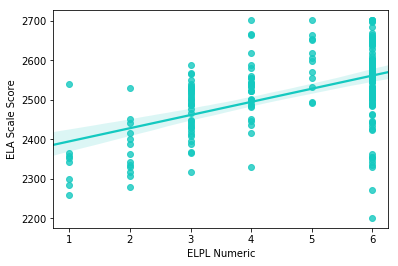

In [146]:
sns.regplot(x="ELPL Numeric", y="ELA Scale Score", data=df, color = "#14c9c0")

Text(0.5, 0, 'English Language Proficiency Level')

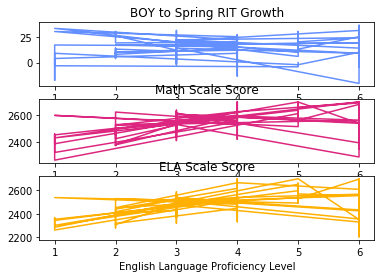

In [59]:
#Think of different data to do this with

plt.subplot(3,1,1)
plt.plot(df["ELPL Numeric"], df["BOY to Spring RIT Growth"], color = '#648FFF')
plt.title('BOY to Spring RIT Growth')

plt.subplot(3,1,2)
plt.plot(df["ELPL Numeric"], df["Math Scale Score"], color = '#DC267F')
plt.title('Math Scale Score')

plt.subplot(3,1,3)
plt.plot(df["ELPL Numeric"], df["ELA Scale Score"], color = '#FFB000')
plt.title('ELA Scale Score')
plt.xlabel('English Language Proficiency Level')

In [30]:
df["Met Spring Goal?"].value_counts()

Not Yet    61
Y          55
N          48
Yes        42
Name: Met Spring Goal?, dtype: int64

In [34]:
#Replace Y with Yes and N and Not Yet with No 

df.replace("Y","Yes", inplace = True)
df.replace(["N","Not Yet"],"No", inplace = True)

df["Met Spring Goal?"].value_counts()

No     109
Yes     97
Name: Met Spring Goal?, dtype: int64

In [195]:
#Combine Filipino with Asian

df.replace("Filipino","Asian",inplace = True)

df["Race/Ethnicity"].value_counts()

Hispanic or Latino                     157
Asian                                   42
White                                    4
Native Hawaiian or Pacific Islander      2
Black or African American                1
Name: Race/Ethnicity, dtype: int64

In [197]:
#Shorten Native Hawaiian and Pacific Islander, Latino, and Black 

df.replace("Native Hawaiian or Pacific Islander","Pacific Islander",inplace = True)
df.replace("Hispanic or Latino","Latino", inplace = True)
df.replace("Black or African American","Black", inplace = True)

df["Race/Ethnicity"].value_counts()

Latino              157
Asian                42
White                 4
Pacific Islander      2
Black                 1
Name: Race/Ethnicity, dtype: int64

In [36]:
df["Language Code"].value_counts()

SPA    133
VIE     34
ENG     31
PHI      2
POR      1
CHI      1
MKH      1
JPN      1
FRE      1
PAN      1
Name: Language Code, dtype: int64

In [41]:
df["ED Numeric"].dtypes

dtype('int64')

In [275]:
#Add a new column with numeric versions of the Achievement Levels for Math

df["Num Math AL"] = df["Math Achievement Level"].replace({"Standard Exceeded": 4, "Standard Met": 3, "Standard Nearly Met": 2, "Standard Not Met": 1})



In [279]:
#Add a new column with numeric versions of the Achievement Levels for ELA


df["Num ELA AL"] = df["ELA Achievement Level"].replace({"Standard Exceeded": 4, "Standard Met": 3, "Standard Nearly Met": 2, "Standard Not Met": 1})

In [285]:
#Add new column with race categories combined 

df["Combined Race"] = df["Race/Ethnicity"].replace({"White": "Other", "Pacific Islander": "Other", "Black": "Other"})






In [287]:
df["Combined Race"].value_counts()

Latino    157
Asian      42
Other       7
Name: Combined Race, dtype: int64

In [44]:
df["Num Math AL"].value_counts()

4    96
3    45
2    39
1    26
Name: Num Math AL, dtype: int64

In [45]:
df.size

7828

In [51]:
df["Language Code"].value_counts()

SPA    133
VIE     34
ENG     31
PHI      2
POR      1
CHI      1
MKH      1
JPN      1
FRE      1
PAN      1
Name: Language Code, dtype: int64

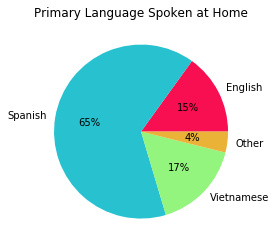

In [76]:
languages = ["English","Spanish", "Vietnamese", "Other"]
counts = [31,133,34,8]
colors = ["#f70f51","#27c1cf","#93f57d","#ebb238"]
plt.pie(counts, labels = languages, colors = colors, autopct = "%1.0f%%")
plt.title("Primary Language Spoken at Home")
plt.show()

In [63]:
df["English Language Proficiency Level"].value_counts()

INTERMEDIATE          37
EARLY ADVANCED        29
EARLY INTERMEDIATE    13
ADVANCED              12
BEGINNING              8
Name: English Language Proficiency Level, dtype: int64

In [64]:
df["LEP Status"].value_counts()

N    129
Y     77
Name: LEP Status, dtype: int64

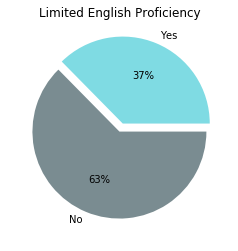

In [77]:
LEP = ["Yes","No"]
counts = [77,129]
explode = [0.1,0]
colors = ["#7fdbe3","#7a8c91"]
plt.pie(counts, explode = explode, labels = LEP, colors = colors, autopct = "%1.0f%%")
plt.title("Limited English Proficiency")
plt.show()

In [177]:
df["Economically Disadvantaged Status"].value_counts()

Y    132
N     74
Name: Economically Disadvantaged Status, dtype: int64

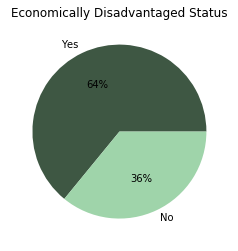

In [179]:
ED = ["Yes","No"]
counts = [132,74]
colors = ["#3e5743","#9fd4aa"]
plt.pie(counts, labels = ED, colors = colors, autopct = "%1.0f%%")
plt.title("Economically Disadvantaged Status")
plt.show()

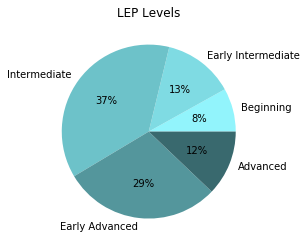

In [331]:
level = ["Beginning","Early Intermediate","Intermediate","Early Advanced","Advanced"]
counts = [8,13,37,29,12]
colors = ["#92f4fc","#7fdbe3","#6dc2c9","#54969c","#39696e"]
plt.pie(counts, labels = level, colors = colors, autopct = "%1.0f%%")
plt.title("LEP Levels")
plt.show()

In [119]:
df["Gender Numeric"] = df["Gender"].replace(
    {"M": 0, 
     "F": 1})

In [29]:
df["Race/Ethnicity"].value_counts()

Hispanic or Latino                     157
Asian                                   39
White                                    4
Filipino                                 3
Native Hawaiian or Pacific Islander      2
Black or African American                1
Name: Race/Ethnicity, dtype: int64

In [30]:
df["Race Numeric"] = df["Race/Ethnicity"].replace(
    {"Black or African American": 1, 
     "Native Hawaiian or Pacific Islander": 2,
     "Filipino":3,
     "White":4,"Asian":5, "Hispanic or Latino":6})

In [31]:
df.head()

,Year,Gender,Race/Ethnicity,LEP Status,LEP Numeric,Economically Disadvantaged Status,ED Numeric,Language Code,English Language Proficiency Level,ELPL Numeric,...,Met Winter goal?,Met Winter Goal Numeric,Spring RIT,Spring %ile,BOY to Spring RIT Growth,Winter to Spring RIT Growth,Met Spring Goal?,Met Spring Goal Numeric,Gender Numeric,Race Numeric
0,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,Yes,1,201,24,6,-11,Not Yet,0,0,6
1,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,Yes,1,201,24,2,-9,Not Yet,0,0,6
2,2017,M,White,N,0,Y,1,ENG,NaN,6,...,Yes,1,212,51,5,-1,Not Yet,0,1,4
3,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,No,0,203,28,3,5,Not Yet,0,0,6
4,2017,F,Hispanic or Latino,N,0,N,0,ENG,NaN,6,...,No,0,215,59,6,5,Not Yet,0,0,6


In [32]:
df["Language Code Numeric"] = df["Language Code"].replace(
    {"ENG": 1, 
     "SPA": 2,
     "VIE":3,
     "PHI":4,"POR":5, "CHI":6,"MKH":7,"JPN":8,"FRE":9,"PAN":10})

In [130]:
df["Language Code"].value_counts()

SPA    133
VIE     34
ENG     31
PHI      2
POR      1
CHI      1
MKH      1
JPN      1
FRE      1
PAN      1
Name: Language Code, dtype: int64